In [39]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime   # package that helps manipulate dates
import matplotlib.dates as mdates
import calendar

In [40]:
def read_and_clean(filepath):
    ''' Read file at filepath, rename columns to UPPER,
    to_numeric numerical data, sort by descending order'''
    
    df = pd.read_csv(filepath)
    data = df.copy()
    data.date = pd.to_datetime(data.date)
    data = data.sort_values(by='date', ascending=False)

    data.columns = ['date','PM25','PM10','O3','NO2','SO2','CO']

    for col in data.columns:
        if col != "date":
            data[col] = pd.to_numeric(data[col], errors='coerce')

    return data

bjg_df = read_and_clean('data/beijing, west park.csv') # Capital city
pzh_df = read_and_clean('data/panzhihua.csv') # Steel industry
szh_df = read_and_clean('data/shuozhou.csv') # Coal center, Shanxi
tyn_df = read_and_clean('data/taiyuan.csv') # Shanxi's capital city
btu_df = read_and_clean('data/baotou.csv') # REE mining at Bayan Obo
gzh_df = read_and_clean('data/ganzhou.csv')
tsh_df = read_and_clean('data/tangshan.csv')
qhd_df = read_and_clean('data/qinhuangdao.csv')
shh_df = read_and_clean('data/shanghai.csv')

coal = pd.read_csv('data/coal-SH-QHA.csv')
coal.date = pd.to_datetime(coal.date)
coal = coal.sort_values(by='date', ascending=False)
coal.columns = ['date', 'price']
for col in coal.columns:
        if col != "date":
            coal[col] = pd.to_numeric(coal[col], errors='coerce')

/var/folders/n0/qhjx1vrd1c1b846x7pqgmbg40000gn/T/ipykernel_98867/1948750858.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.date = pd.to_datetime(data.date)
/var/folders/n0/qhjx1vrd1c1b846x7pqgmbg40000gn/T/ipykernel_98867/1948750858.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.date = pd.to_datetime(data.date)
/var/folders/n0/qhjx1vrd1c1b846x7pqgmbg40000gn/T/ipykernel_98867/1948750858.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.date = pd.to_datetime(data.date)
/var/folders/n0/qhjx1vrd1c1b846x7pqgmbg40000gn/T/ipykernel_98867/1948750858.py:29:

In [41]:
from dateutil.parser import parse     # package for date parsing
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})  # increase dots per inch ...

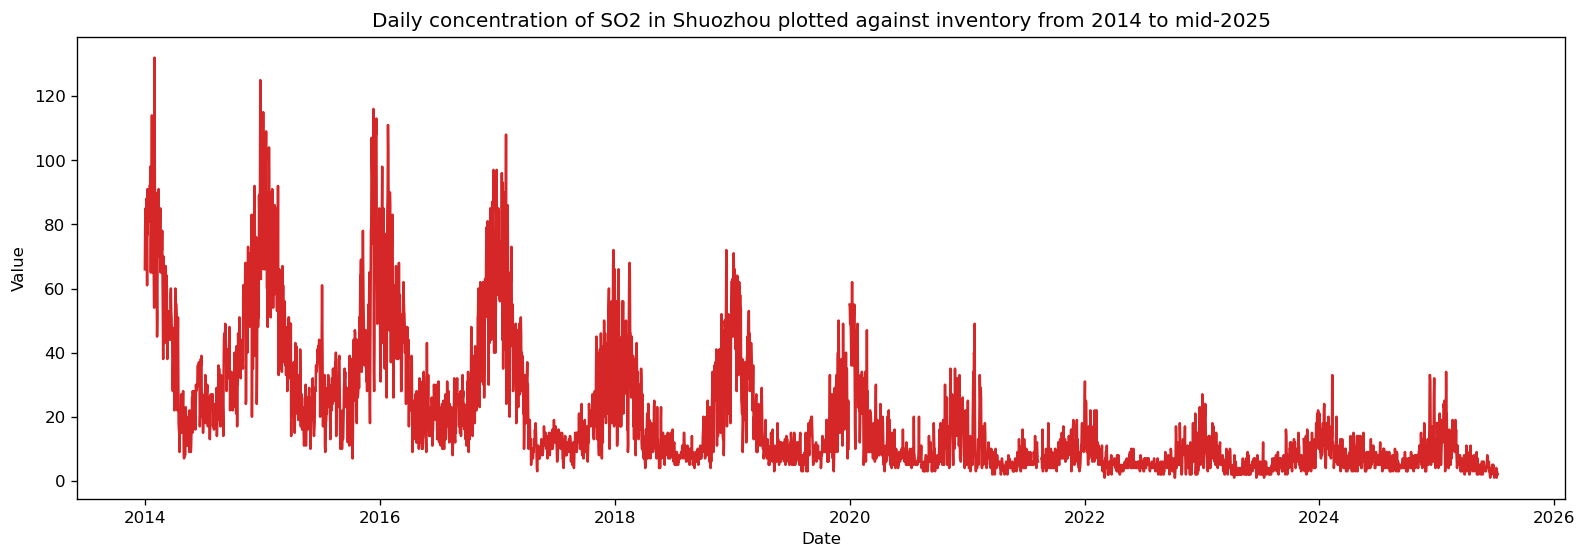

In [42]:
def plot_df(df, pollutant, title=""):
    '''
    Plot daily pollution data
    '''
    plt.figure(figsize=(16,5))
    plt.plot(df.date, df[pollutant], color='tab:red')
    plt.gca().set(title=title, xlabel='Date', ylabel='Value')
    plt.show()

plot_df(szh_df, pollutant='SO2', title='Daily concentration of SO2 in Shuozhou plotted against inventory from 2014 to mid-2025')

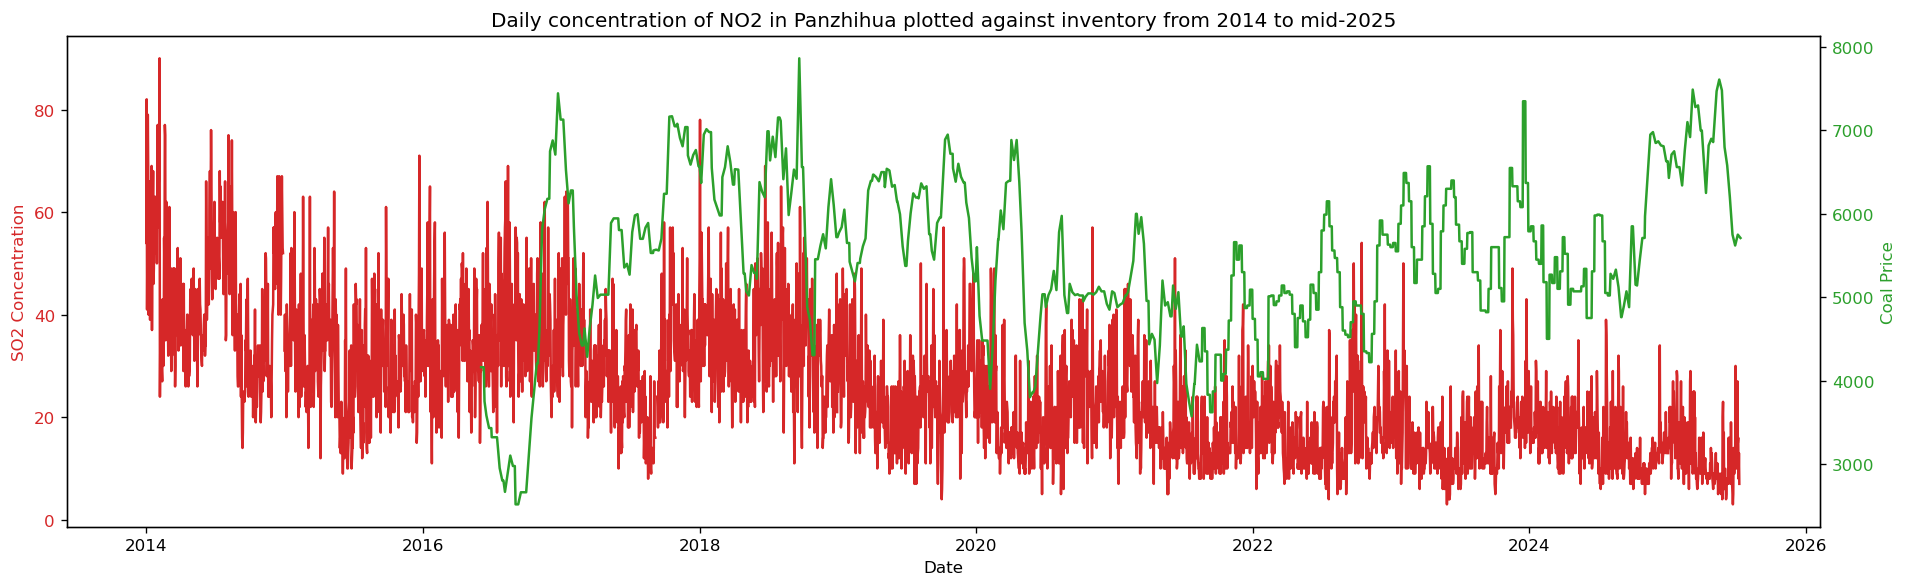

In [43]:
def econ_Pollution(df, pollutant, economic_indicator, title=""):
    '''
    Pollutant vs economic indicator
    '''
    fig, ax1 = plt.subplots(figsize=(16, 5))

    # Plot the primary y-axis data (e.g., SO2)
    ax1.plot(df.date, df[pollutant], color='tab:red', label=f'{pollutant} Concentration')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{pollutant} Concentration', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    # Create secondary y-axis for coal prices
    ax2 = ax1.twinx()
    ax2.plot(economic_indicator['date'], economic_indicator['price'], color='tab:green', label='Coal Price')
    ax2.set_ylabel('Coal Price', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(title)
    fig.tight_layout()
    plt.show()

econ_Pollution(pzh_df, 'SO2', economic_indicator=coal, title='Daily concentration of NO2 in Panzhihua plotted against inventory from 2014 to mid-2025')

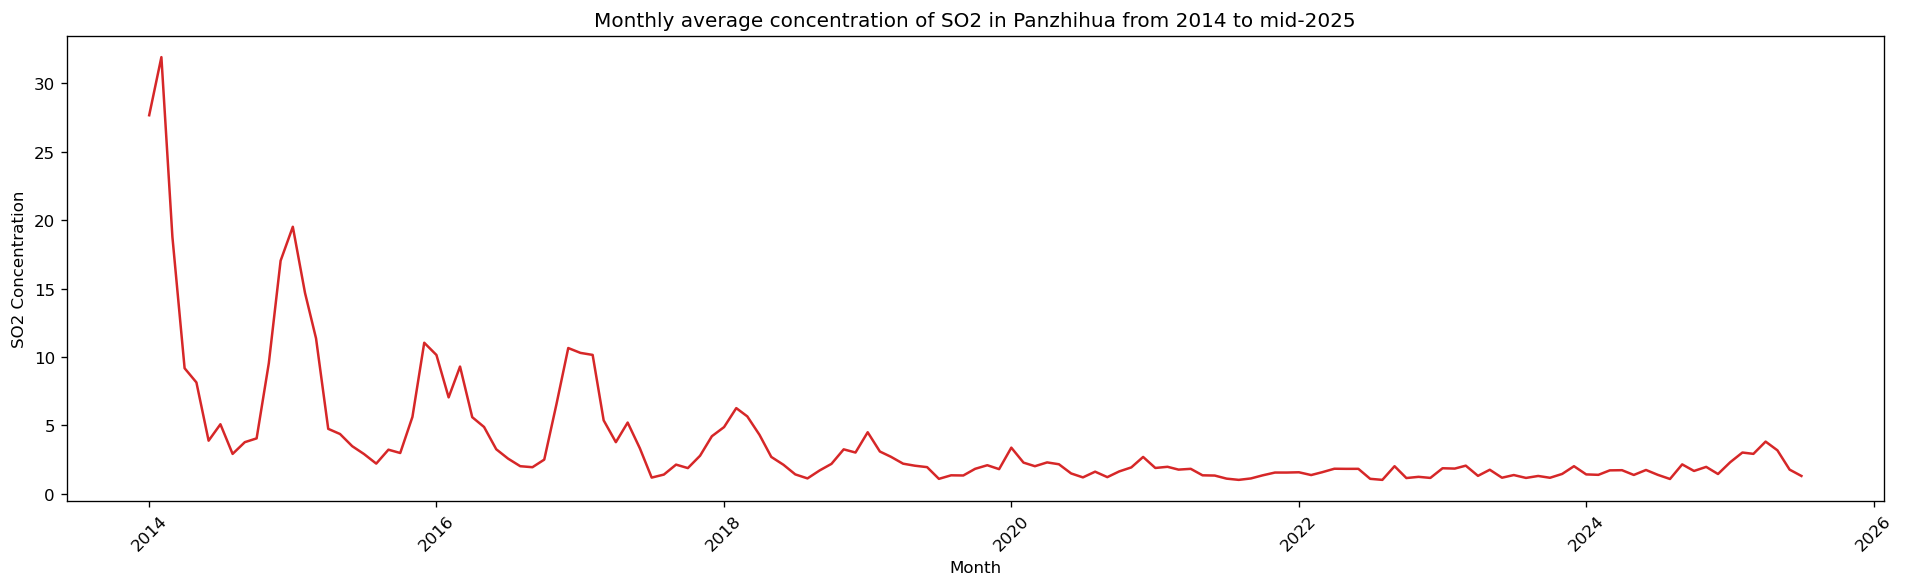

In [44]:
# Convert date to monthly period, then back to Timestamp for plotting
def monthlyAverage(df, city_name, pollutant):
    '''
    Plot monthly average of pollutant at city
    '''
    monthly_df = df.copy()
    monthly_df['year_month'] = monthly_df.date.dt.to_period('M').dt.to_timestamp()

    # Group by the new monthly date
    monthly_avg = monthly_df.groupby('year_month')[pollutant].mean().reset_index()

    def plot_df(x, y, title="", xlabel='Date', ylabel='Value'):
        plt.figure(figsize=(16, 5))
        plt.plot(x, y, color='tab:red')
        plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    plot_df(
        x=monthly_avg['year_month'],
        y=monthly_avg[pollutant],
        title='Monthly average concentration of {pollutant} in {city_name} from 2014 to mid-2025'.format(pollutant=pollutant, city_name=city_name),
        xlabel='Month',
        ylabel='{pollutant} Concentration'.format(pollutant=pollutant)
)

monthlyAverage(bjg_df, 'Panzhihua', 'SO2')

In [45]:
def monthlyAverage(df, pollutant):
    df_copy = df.copy()

    # Convert to monthly timestamps
    df_copy['year_month'] = df_copy.date.dt.to_period('M').dt.to_timestamp()

    # Group and average
    avg1 = df_copy.groupby('year_month')[pollutant].mean().reset_index()

    return avg1

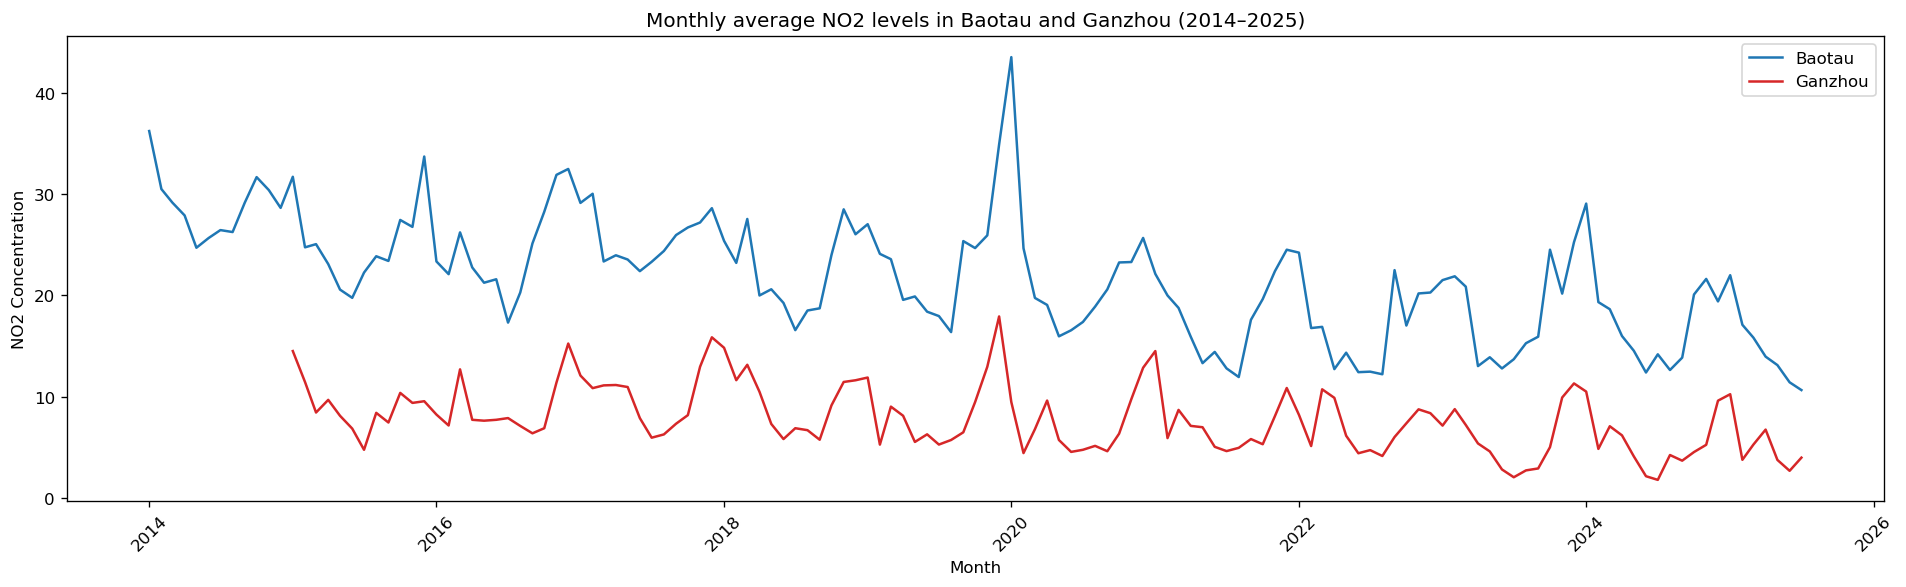

In [46]:
def compareMonthlyAverages(df1, city1, df2, city2, pollutant):
    # Plot
    plt.figure(figsize=(16, 5))
    plt.plot(monthlyAverage(df1, pollutant)['year_month'], monthlyAverage(df1, pollutant)[pollutant], label=city1, color='tab:blue')
    plt.plot(monthlyAverage(df2, pollutant)['year_month'], monthlyAverage(df2, pollutant)[pollutant], label=city2, color='tab:red')

    plt.title(f'Monthly average {pollutant} levels in {city1} and {city2} (2014–2025)')
    plt.xlabel('Month')
    plt.ylabel(f'{pollutant} Concentration')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

compareMonthlyAverages(btu_df, 'Baotau', gzh_df, 'Ganzhou', 'NO2')

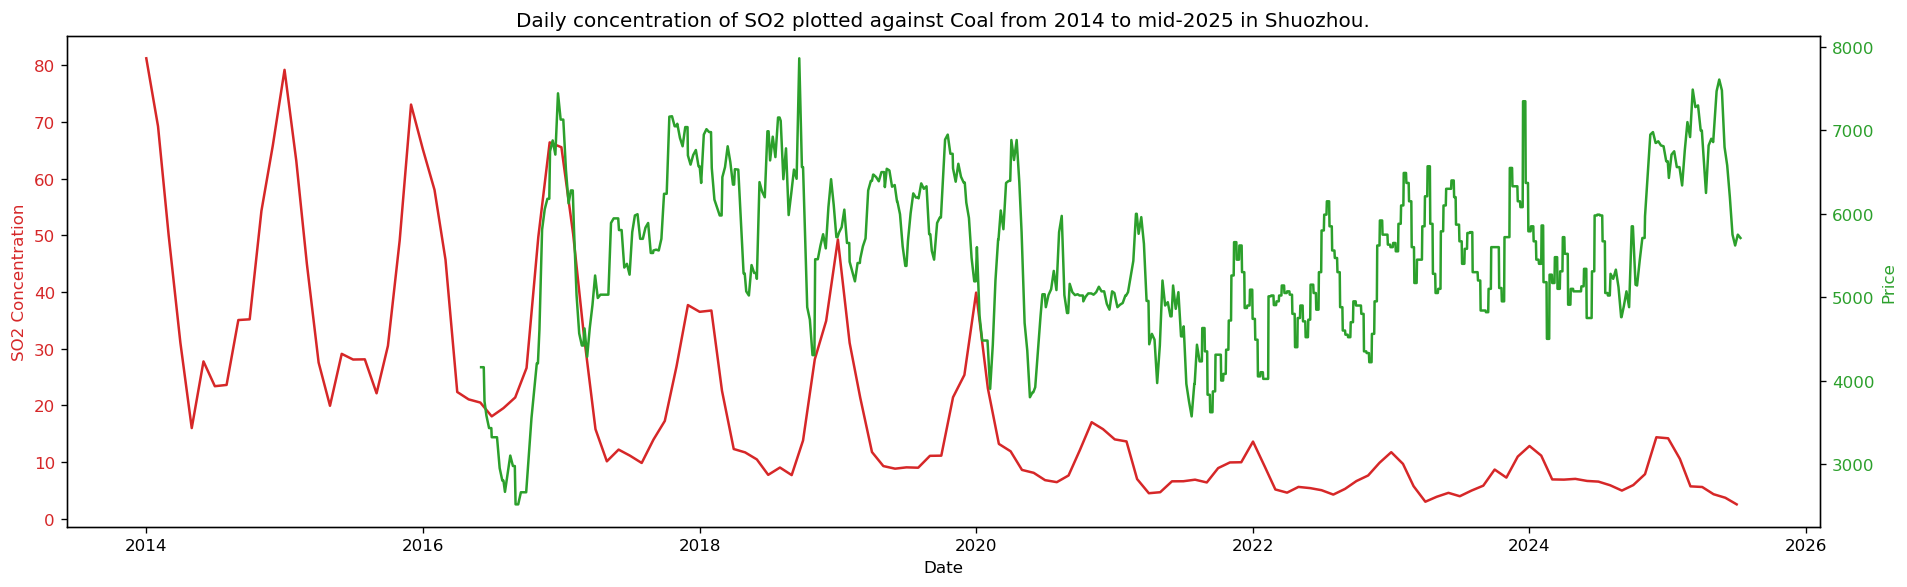

In [47]:
def compareMonthlyAveragesEcon(df, city, pollutant, econ_indicator, econ_indicator_Name=None):
    # Plot
    fig, ax1 = plt.subplots(figsize=(16, 5))

    ax1.plot(monthlyAverage(df, pollutant).year_month, monthlyAverage(df, pollutant)[pollutant], color='tab:red', label=pollutant)
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{pollutant} Concentration', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.plot(econ_indicator['date'], econ_indicator['price'], color='tab:green', label='Coal Price')
    ax2.set_ylabel('Price', color='tab:green')
    ax2.tick_params(axis='y', labelcolor='tab:green')

    plt.title(f'Daily concentration of {pollutant} plotted against {econ_indicator_Name} from 2014 to mid-2025 in {city}.')
    fig.tight_layout()
    plt.show()

compareMonthlyAveragesEcon(szh_df, 'Shuozhou', 'SO2', econ_indicator=coal, econ_indicator_Name='Coal')

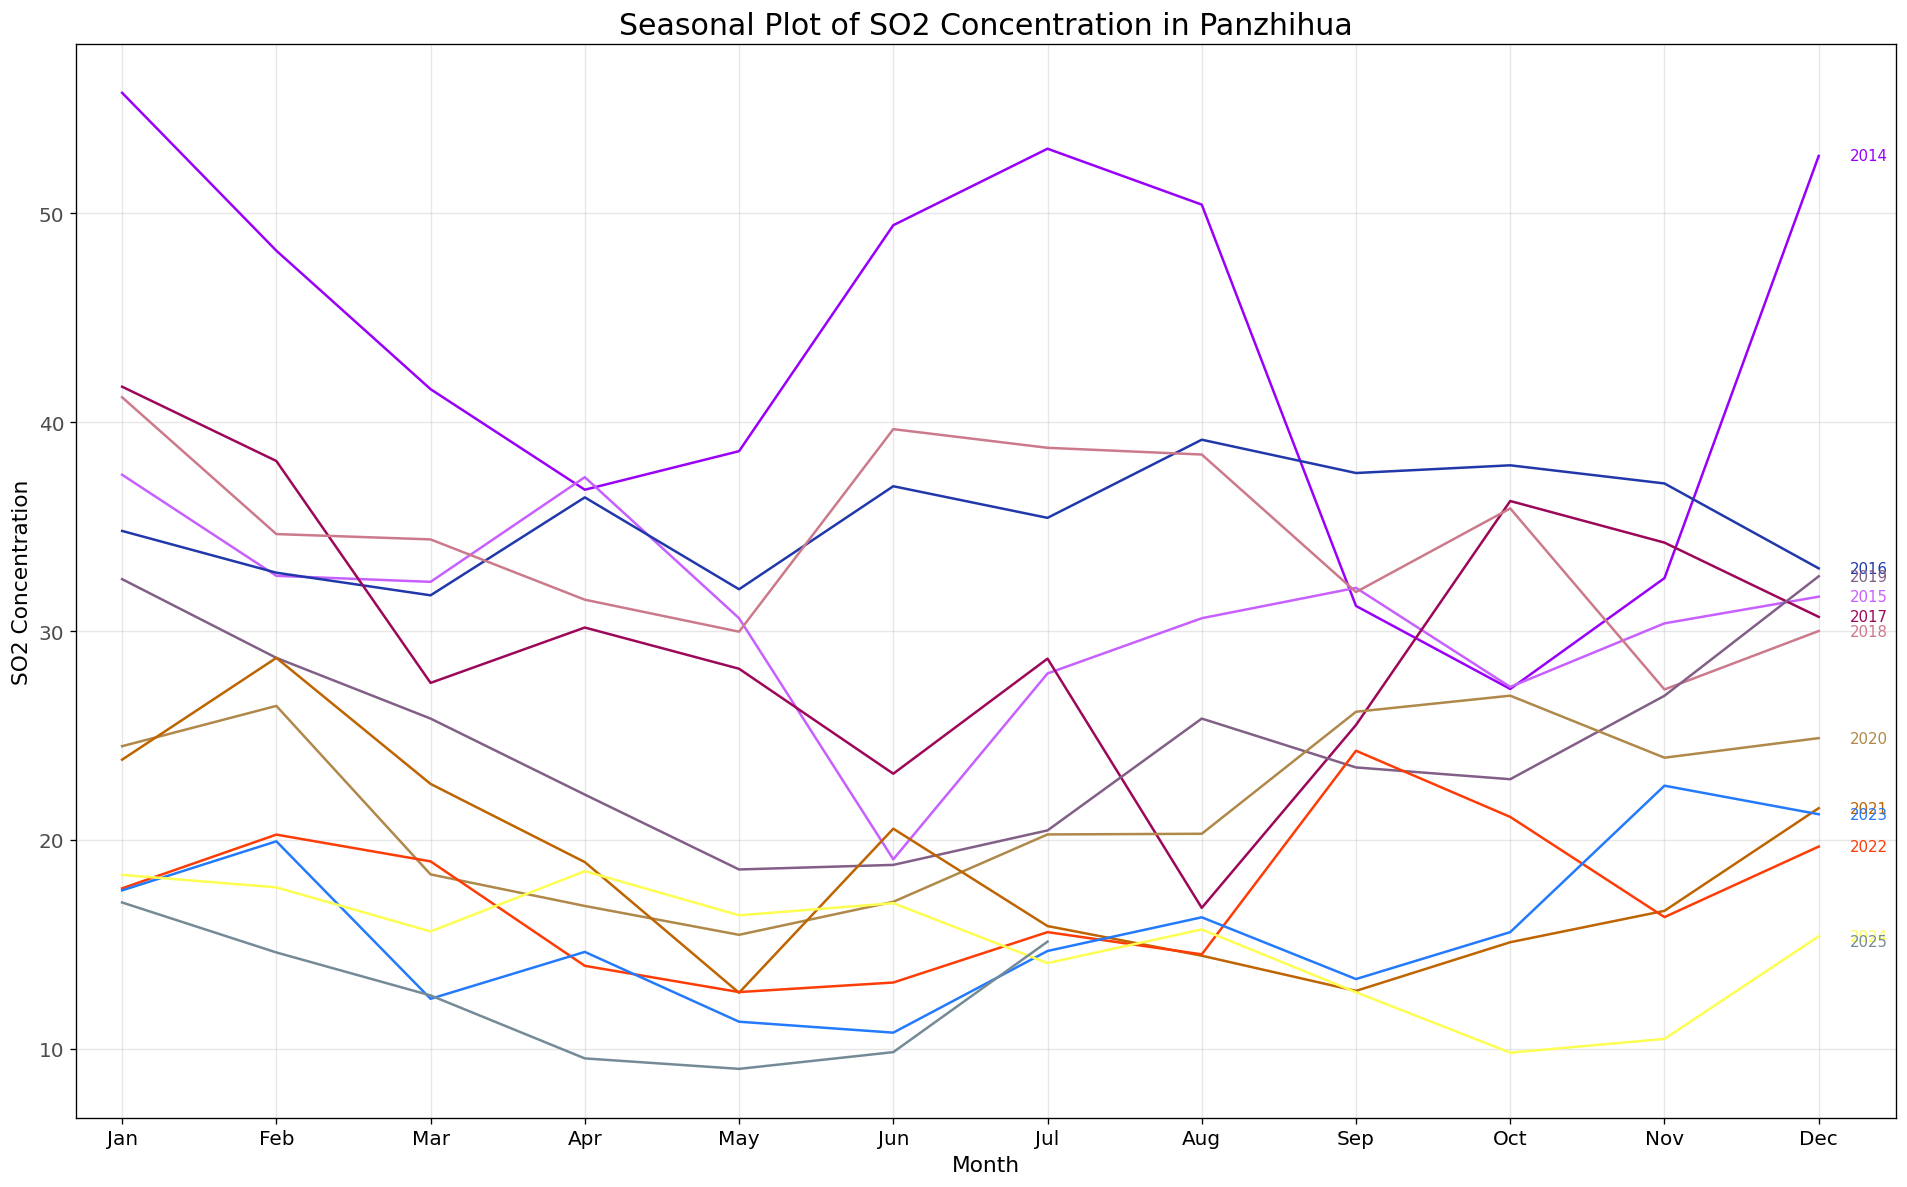

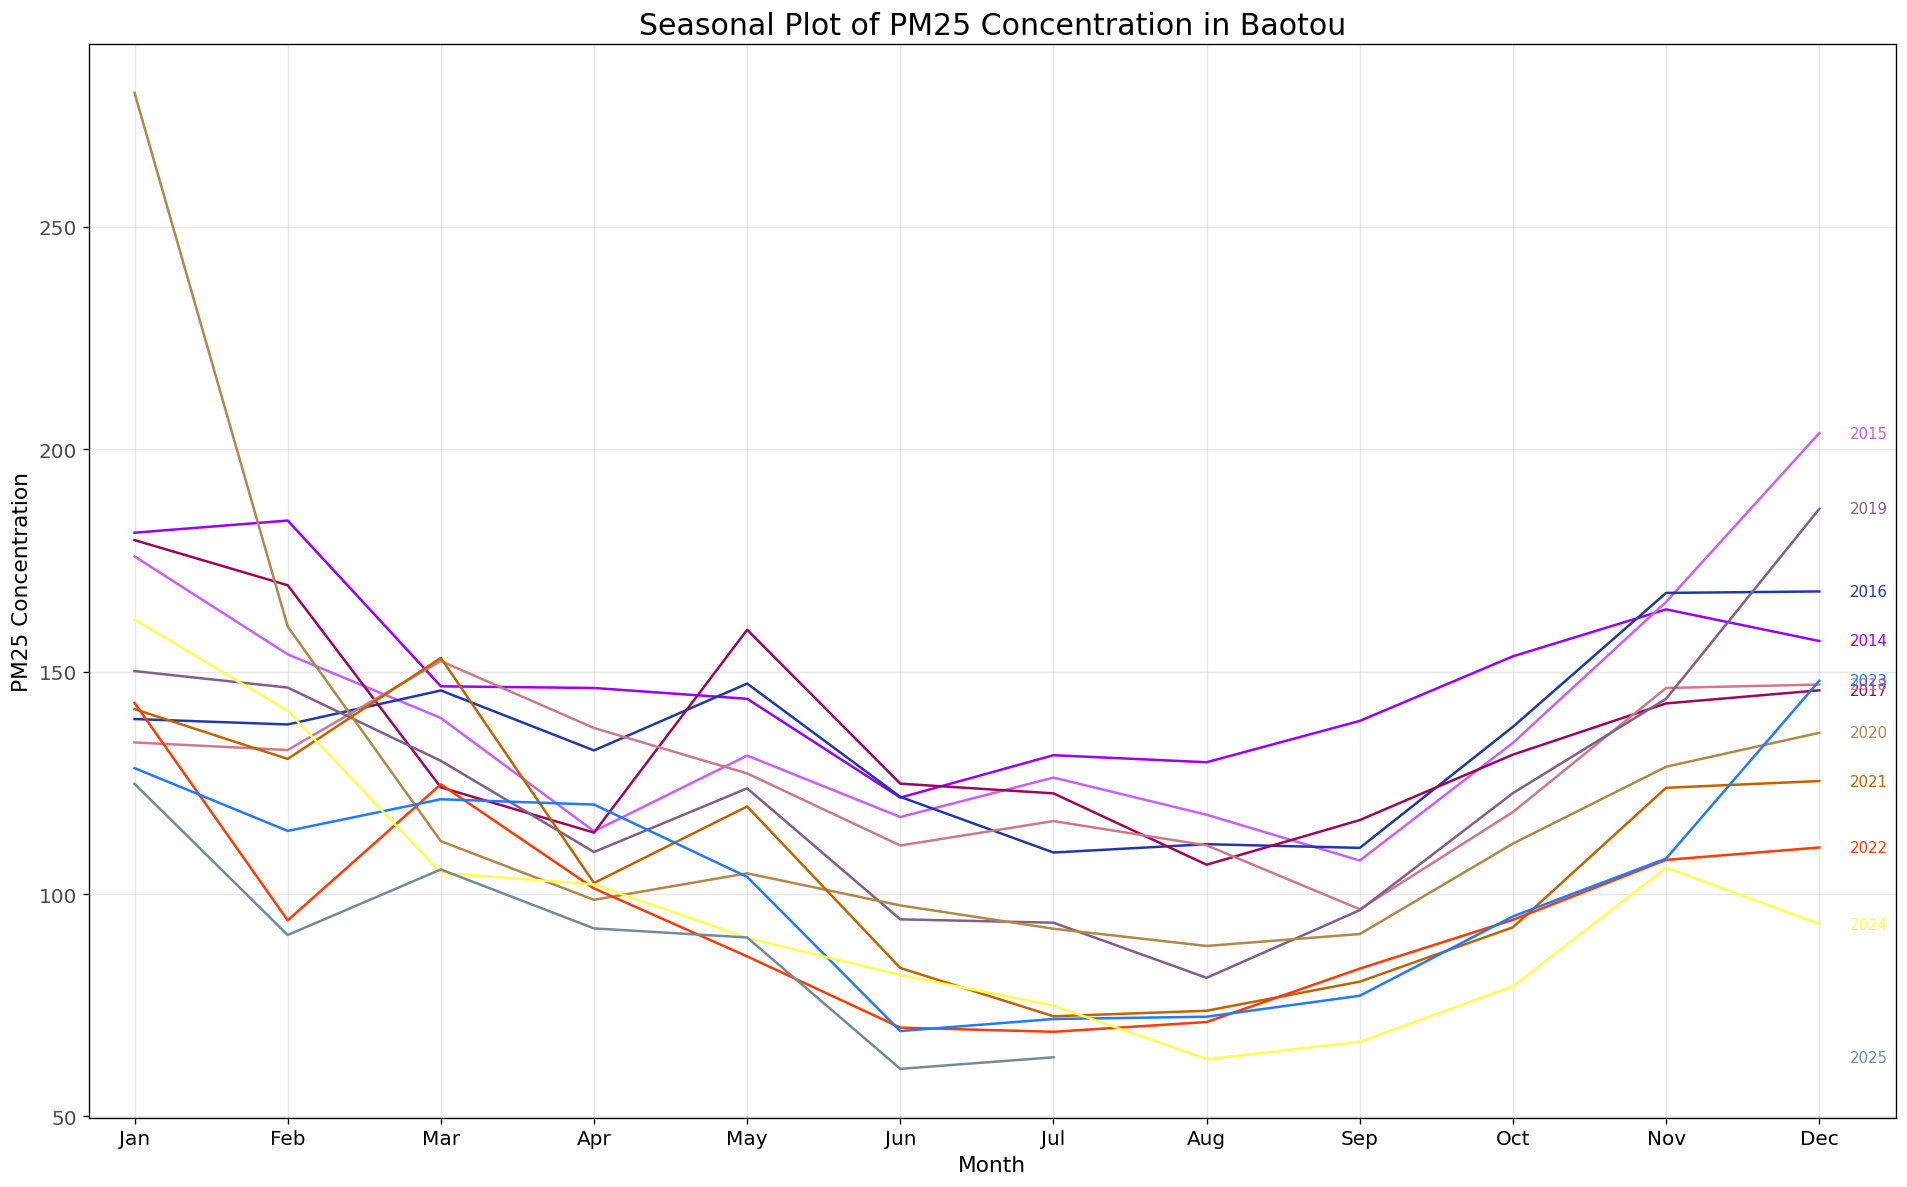

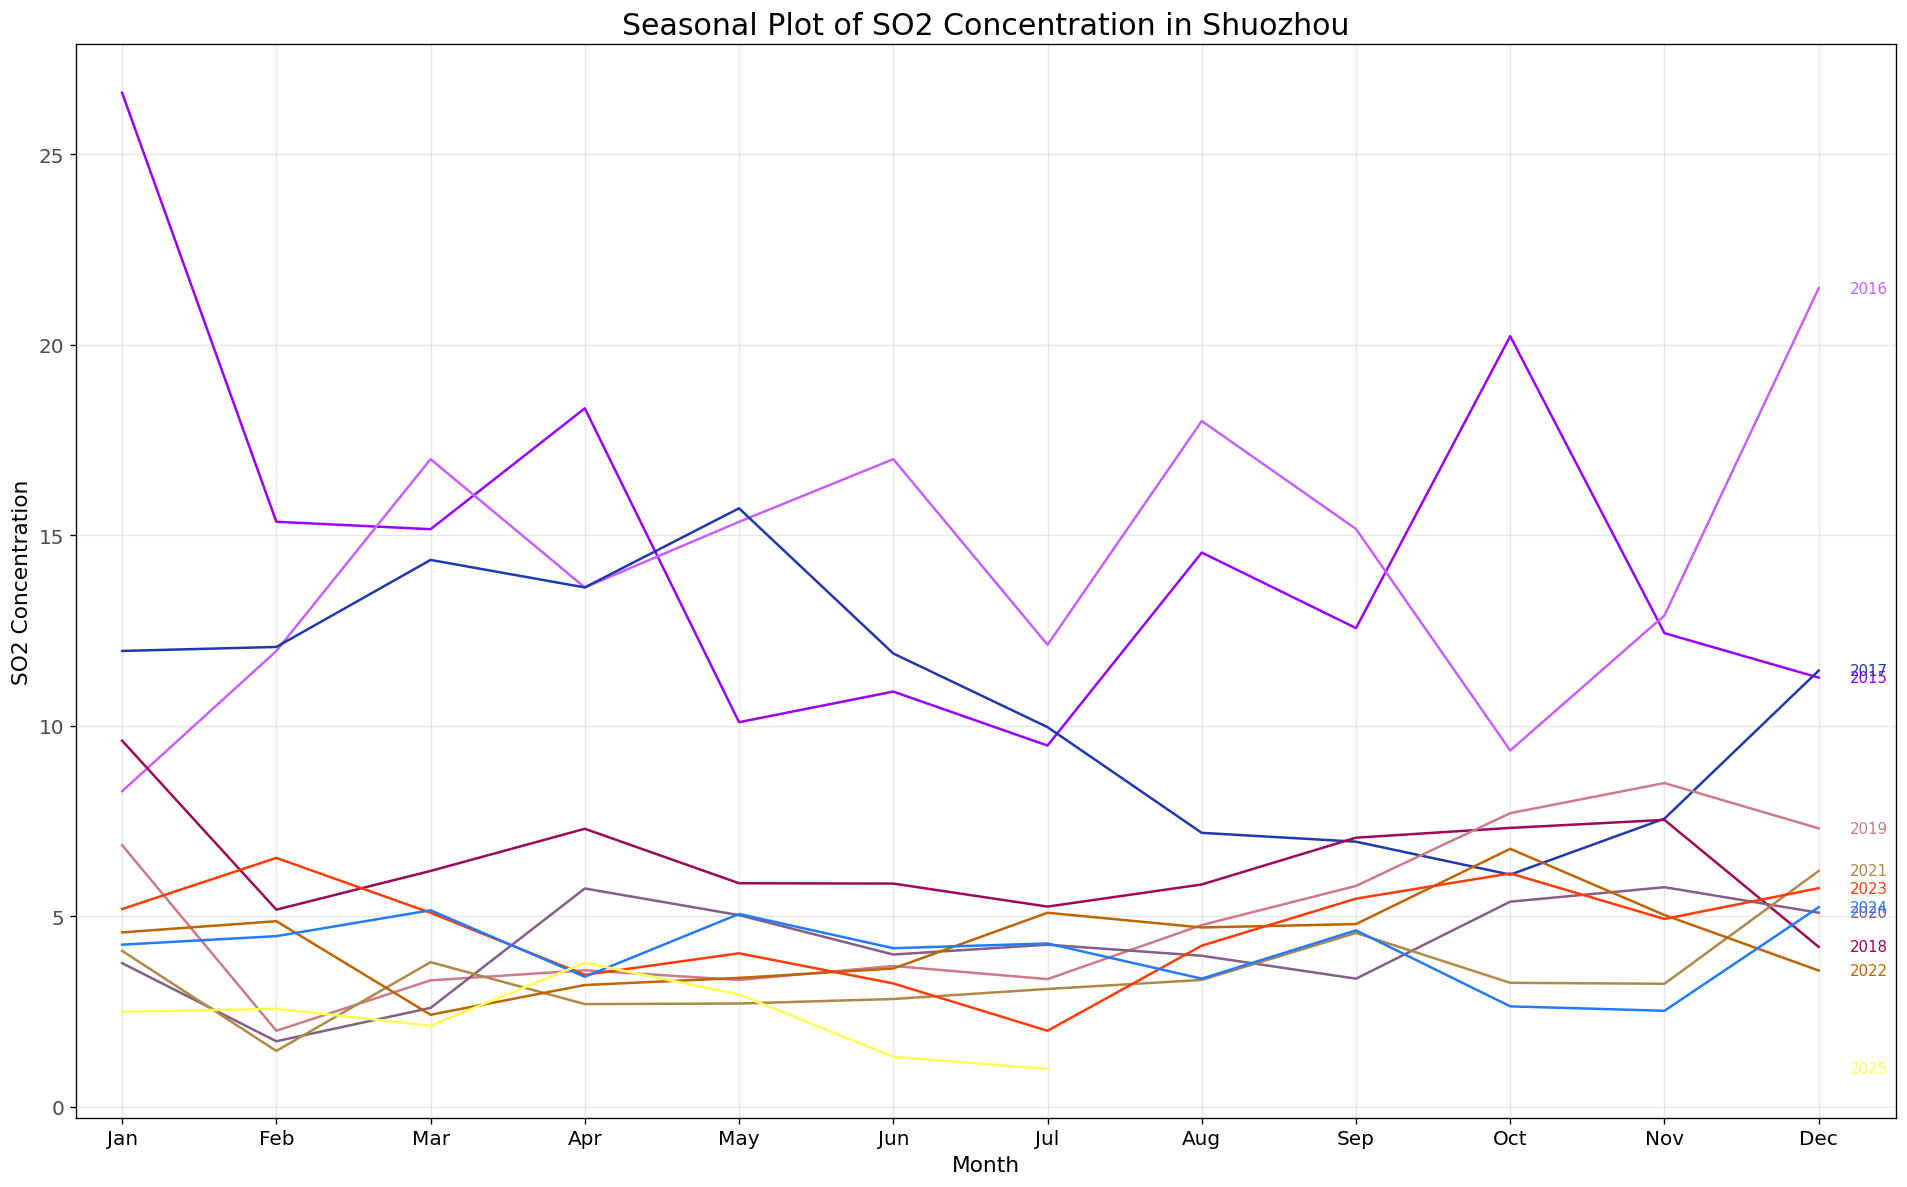

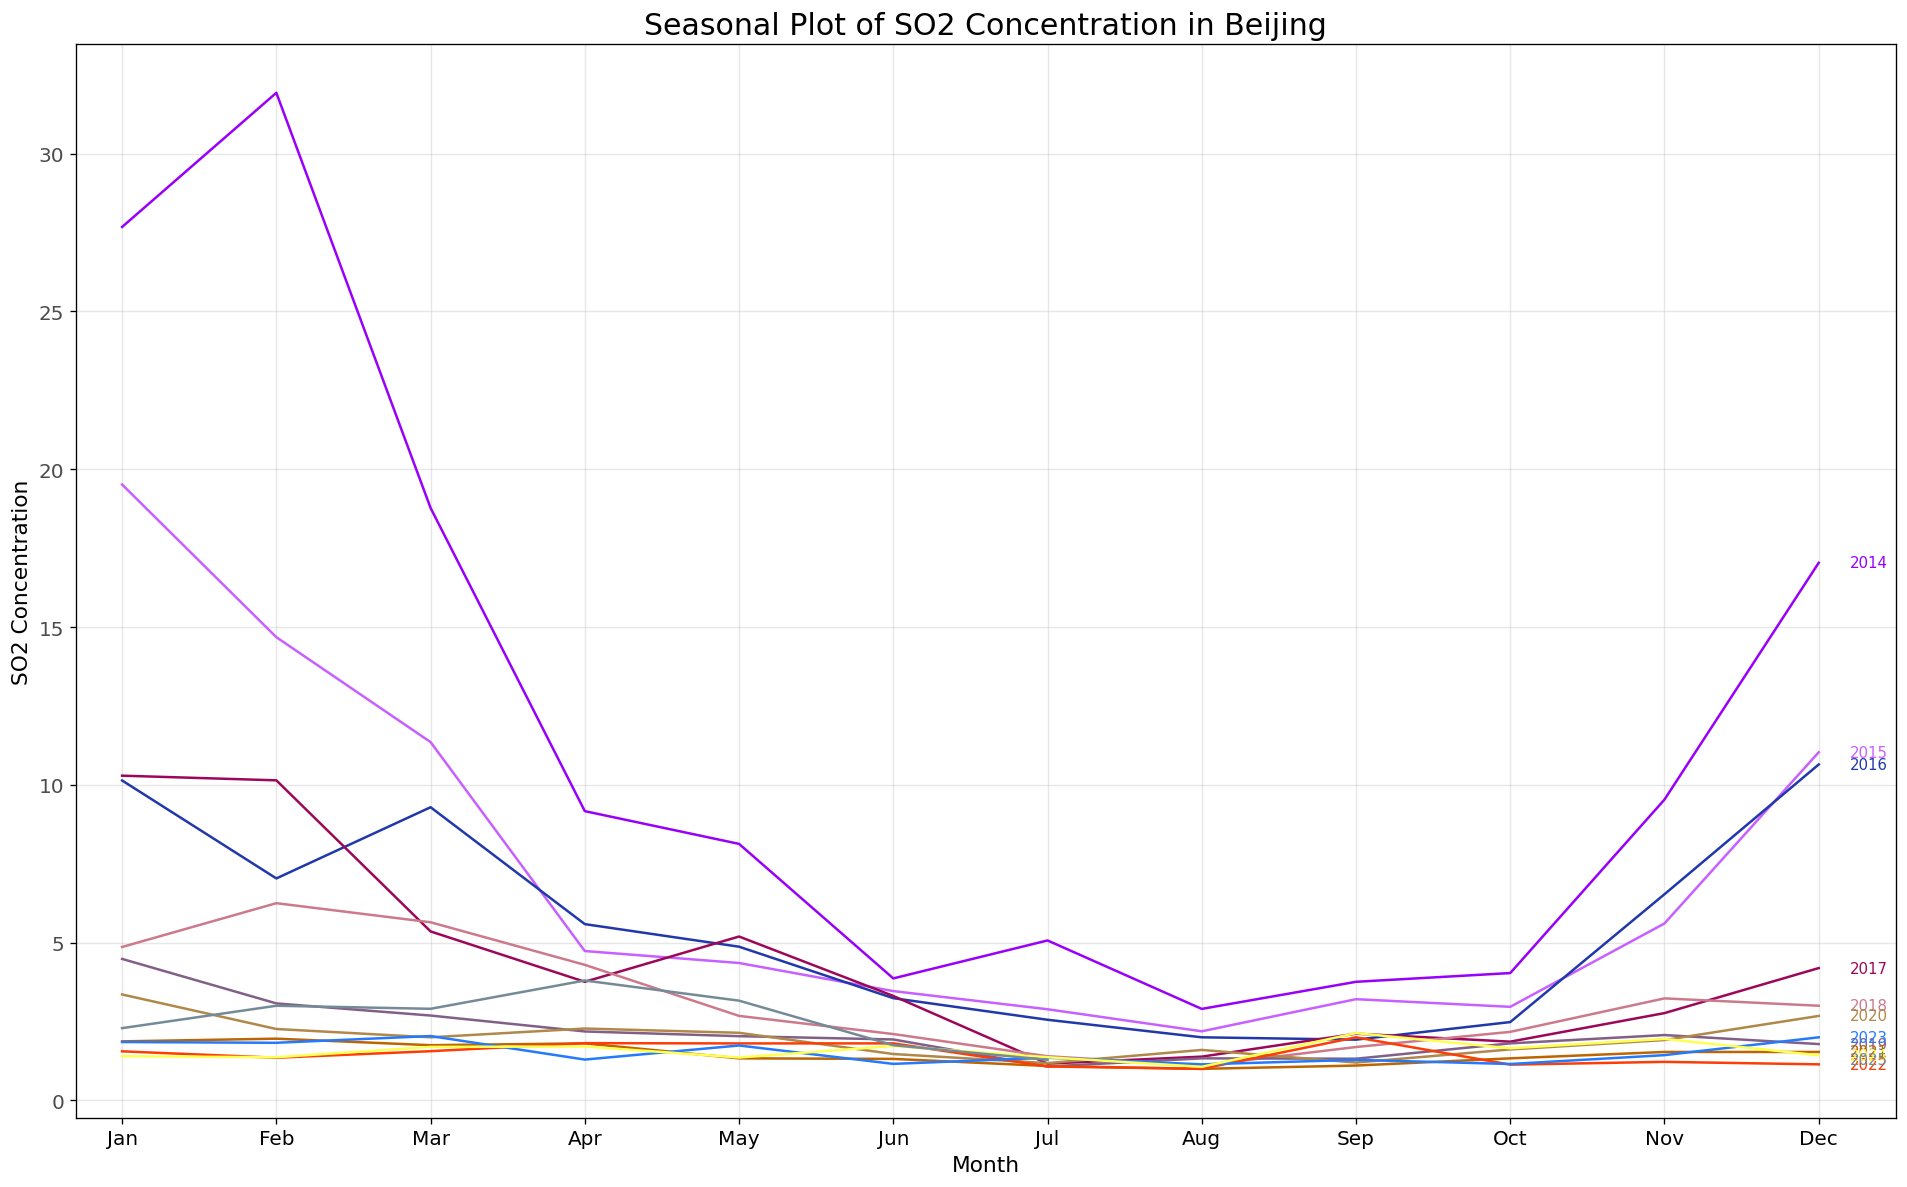

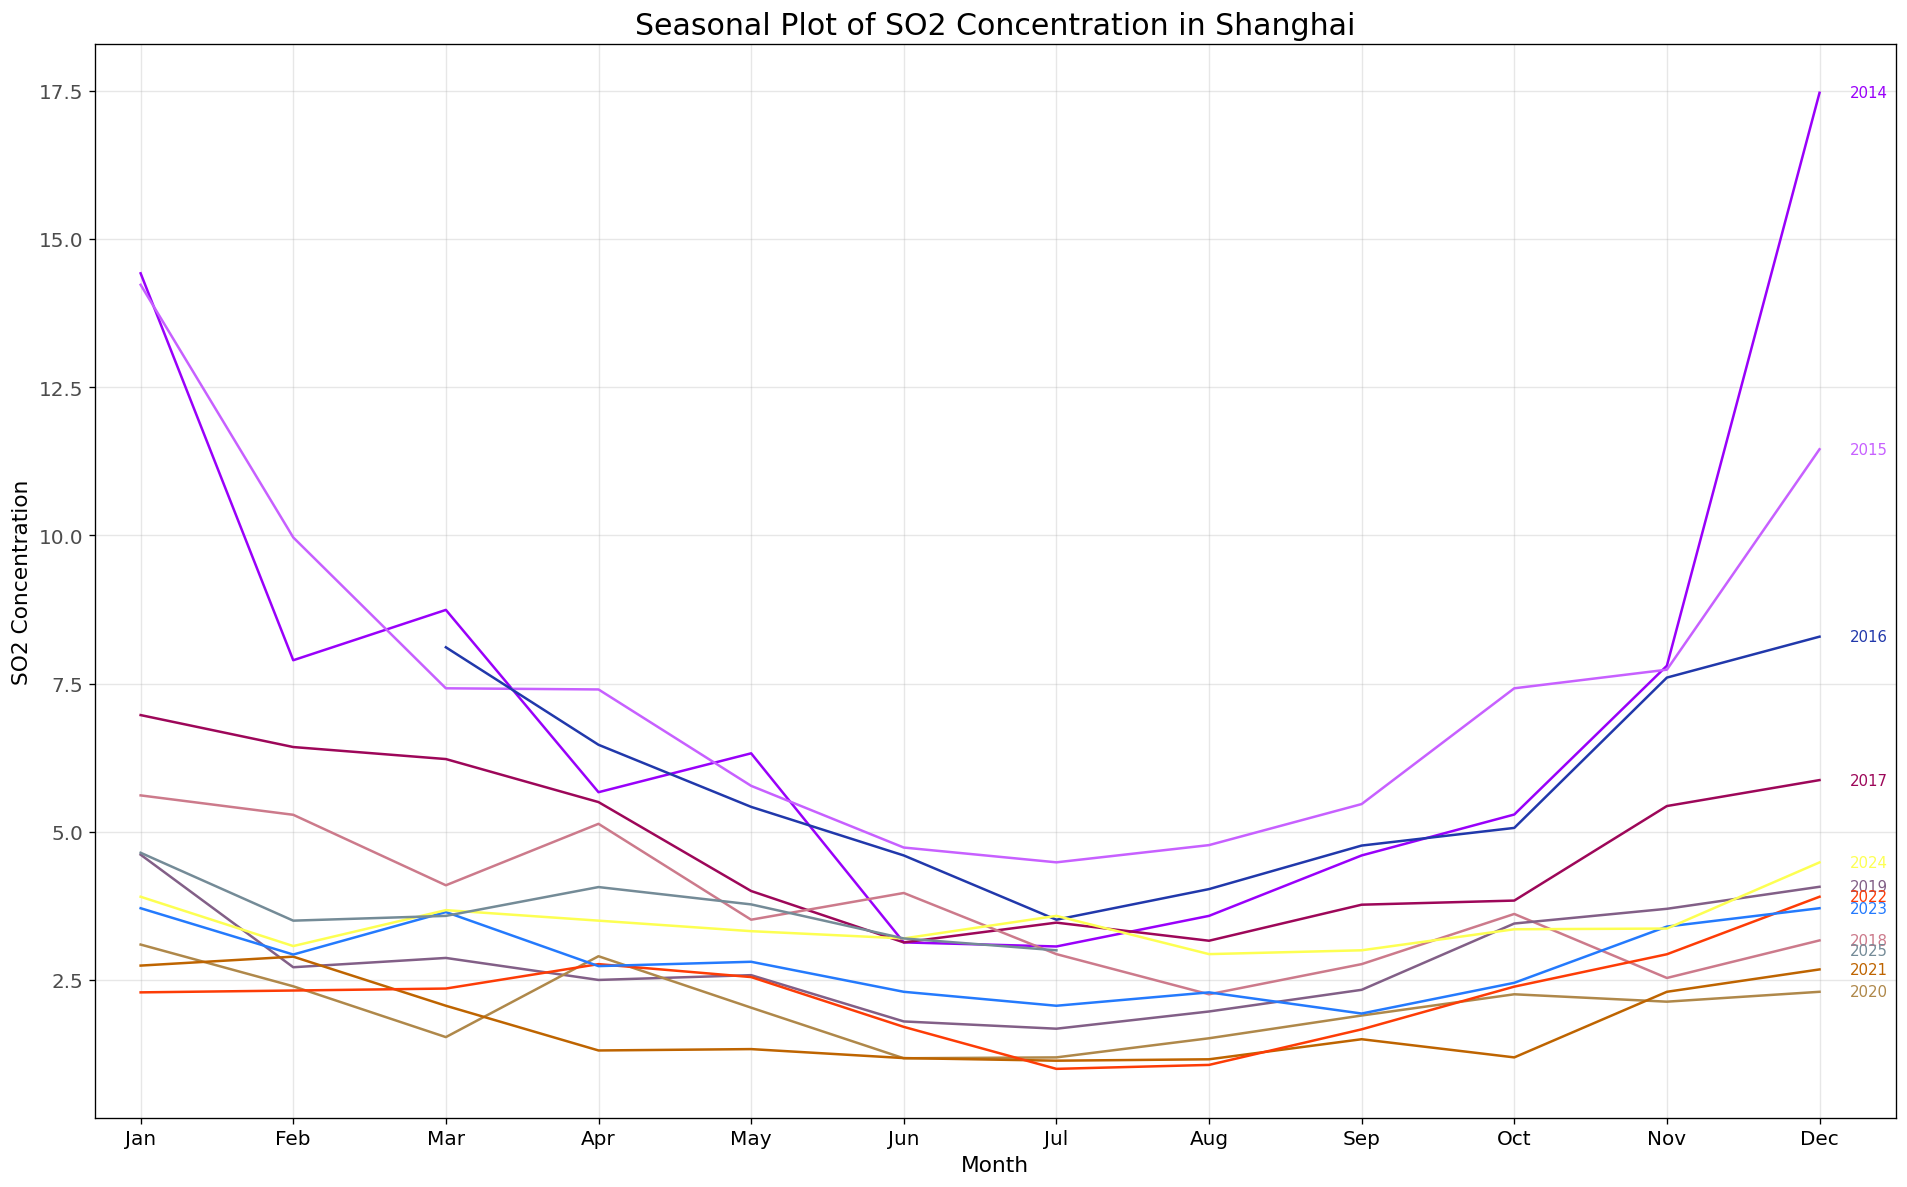

In [48]:
def seasonalityPlot(df, city_name, pollutant):
# Create 'year' and 'month' columns
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['month_abbr'] = df.date.dt.strftime('%b')

    # Get month order
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Aggregate: average SO2 per month per year
    monthly_avg = df.groupby(['year', 'month'])[pollutant].mean().reset_index()
    monthly_avg['month_abbr'] = monthly_avg['month'].apply(lambda x: month_order[x - 1])

    # Get unique years
    years = sorted(monthly_avg['year'].unique())

    # Random colors
    np.random.seed(100)
    mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

    # Plot
    plt.figure(figsize=(16, 10))

    for i, y in enumerate(years):
        year_data = monthly_avg[monthly_avg.year == y]
        plt.plot(
            year_data['month_abbr'],
            year_data[pollutant],
            color=mycolors[i],
            label=y
        )
        
        # Add year label at the end
        last_x = year_data['month_abbr'].values[-1]
        last_y = year_data[pollutant].values[-1]
        plt.text(
            x=11.2,  # right of December
            y=last_y,
            s=str(y),
            color=mycolors[i],
            fontsize=9,
            va='center'
        )

    # Final styling
    plt.xticks(ticks=range(12), labels=month_order, fontsize=12)
    plt.yticks(fontsize=12, alpha=.7)
    plt.xlabel('Month', fontsize=13)
    plt.ylabel('{pollutant} Concentration'.format(pollutant=pollutant), fontsize=13)
    plt.title('Seasonal Plot of {pollutant} Concentration in {city_name}'.format(pollutant=pollutant, city_name=city_name), fontsize=18)
    plt.grid(alpha=0.3)
    plt.xlim(-0.3, 11.5)
    plt.tight_layout()
    plt.show()

seasonalityPlot(pzh_df, 'Panzhihua', 'SO2')
seasonalityPlot(btu_df, 'Baotou', 'PM25')
seasonalityPlot(gzh_df, 'Shuozhou', 'SO2')
seasonalityPlot(bjg_df, 'Beijing', 'SO2')
seasonalityPlot(shh_df, 'Shanghai', 'SO2')

# for col in btu_df.columns:
#     if col != 'date':
#         for df in list_df_new:
#             seasonalityPlot(df, df.head(1), col)

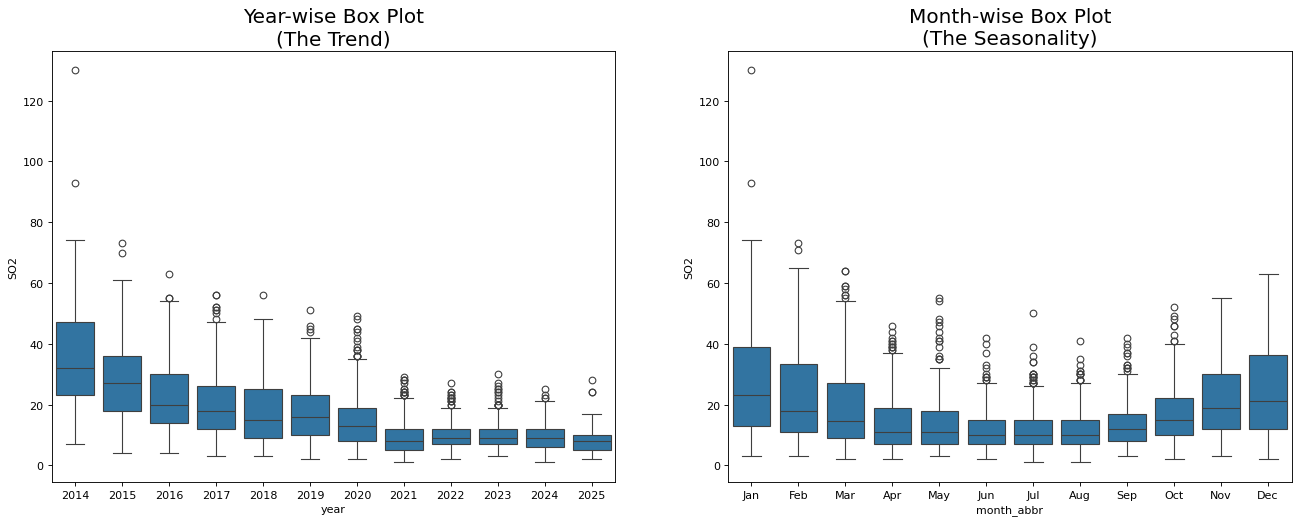

In [49]:
def boxPlot(df, pollutant):
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df['year'] = df.date.dt.year
    df['month'] = df.date.dt.month
    df['month_abbr'] = df.date.dt.strftime('%b')
    fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
    sns.boxplot(x='year', y=pollutant, data=df, ax=axes[0])
    sns.boxplot(x='month_abbr', y=pollutant, data=df.loc[~df.year.isin([2013, 2026]), :], order=month_order)

    # Set Title
    axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
    axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
    plt.show()

boxPlot(btu_df, 'SO2')

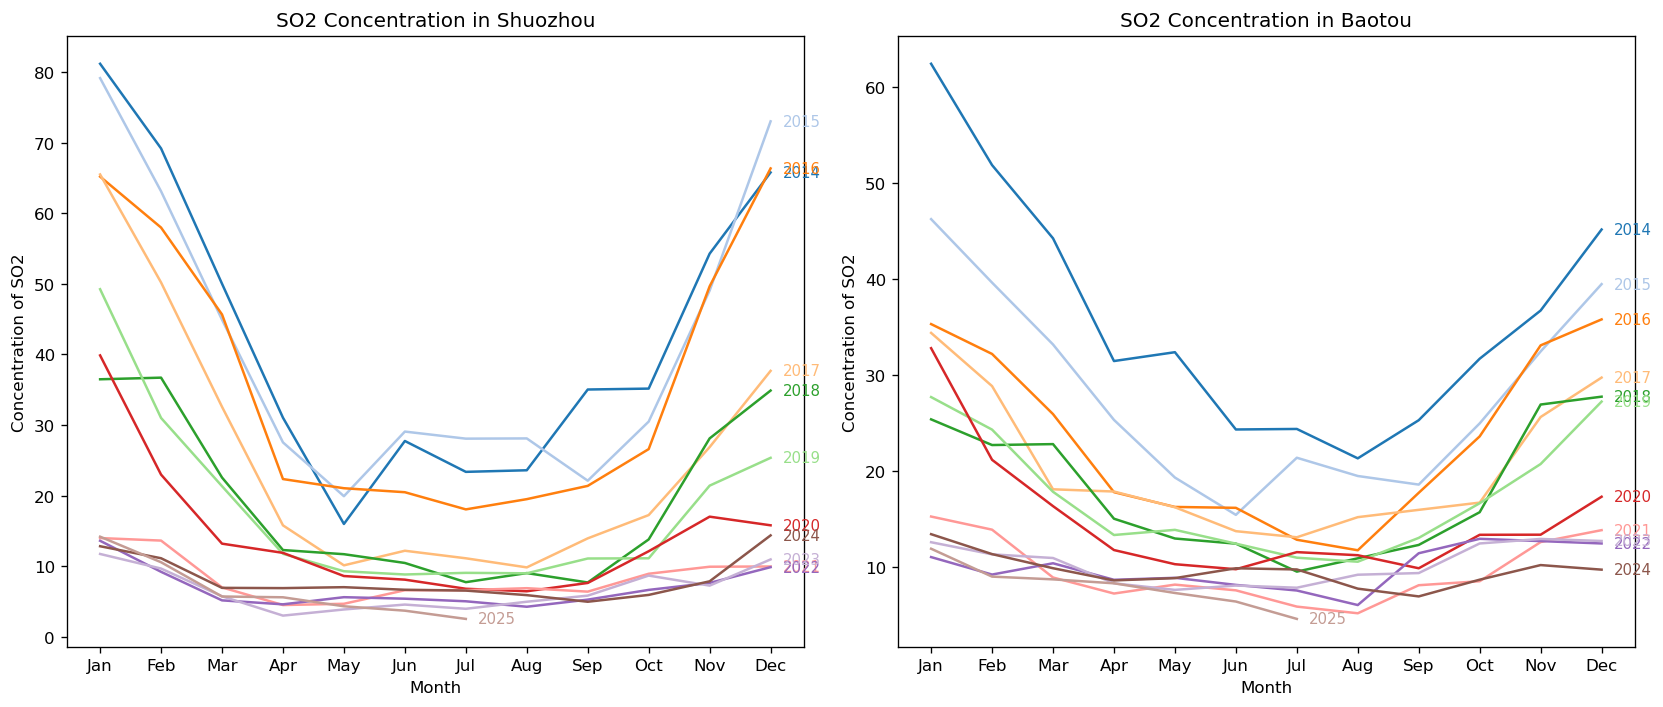

In [50]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

def comparativePlots(df1, city1, df2, city2, pollutant):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    num_years1 = len(df1.date.dt.year.unique())
    num_years2 = len(df2.date.dt.year.unique())

    palette1 = sns.color_palette("tab20", num_years1)
    palette2 = sns.color_palette("tab20", num_years2)

    # First plot: df1
    for i, year in enumerate(sorted(df1.date.dt.year.unique())):
        data = df1[df1.date.dt.year == year]
        monthly = data.groupby(data.date.dt.month)[pollutant].mean()
        sns.lineplot(x=monthly.index, y=monthly.values, color=palette1[i], ax=ax[0])

        ax[0].text(
            x=monthly.index.max() + 0.2,
            y=monthly.values[-1],
            s=str(year),
            color=palette1[i],
            va='center',
            fontsize=9
        )

    ax[0].set_title(f'{pollutant} Concentration in {city1}')
    ax[0].set_xlabel('Month')
    ax[0].set_ylabel(f'Concentration of {pollutant}')
    ax[0].set_xticks(range(1, 13))
    ax[0].set_xticklabels([calendar.month_abbr[m] for m in range(1, 13)])

    # Second plot: df2
    for i, year in enumerate(sorted(df2.date.dt.year.unique())):
        data = df2[df2.date.dt.year == year]
        monthly = data.groupby(data.date.dt.month)[pollutant].mean()
        sns.lineplot(x=monthly.index, y=monthly.values, color=palette2[i], ax=ax[1])

        ax[1].text(
            x=monthly.index.max() + 0.2,
            y=monthly.values[-1],
            s=str(year),
            color=palette2[i],
            va='center',
            fontsize=9
        )

    ax[1].set_title(f'{pollutant} Concentration in {city2}')
    ax[1].set_xlabel('Month')
    ax[1].set_ylabel(f'Concentration of {pollutant}')
    ax[1].set_xticks(range(1, 13))
    ax[1].set_xticklabels([calendar.month_abbr[m] for m in range(1, 13)])

    plt.tight_layout()
    plt.show()

comparativePlots(szh_df, 'Shuozhou', btu_df, 'Baotou', 'SO2')

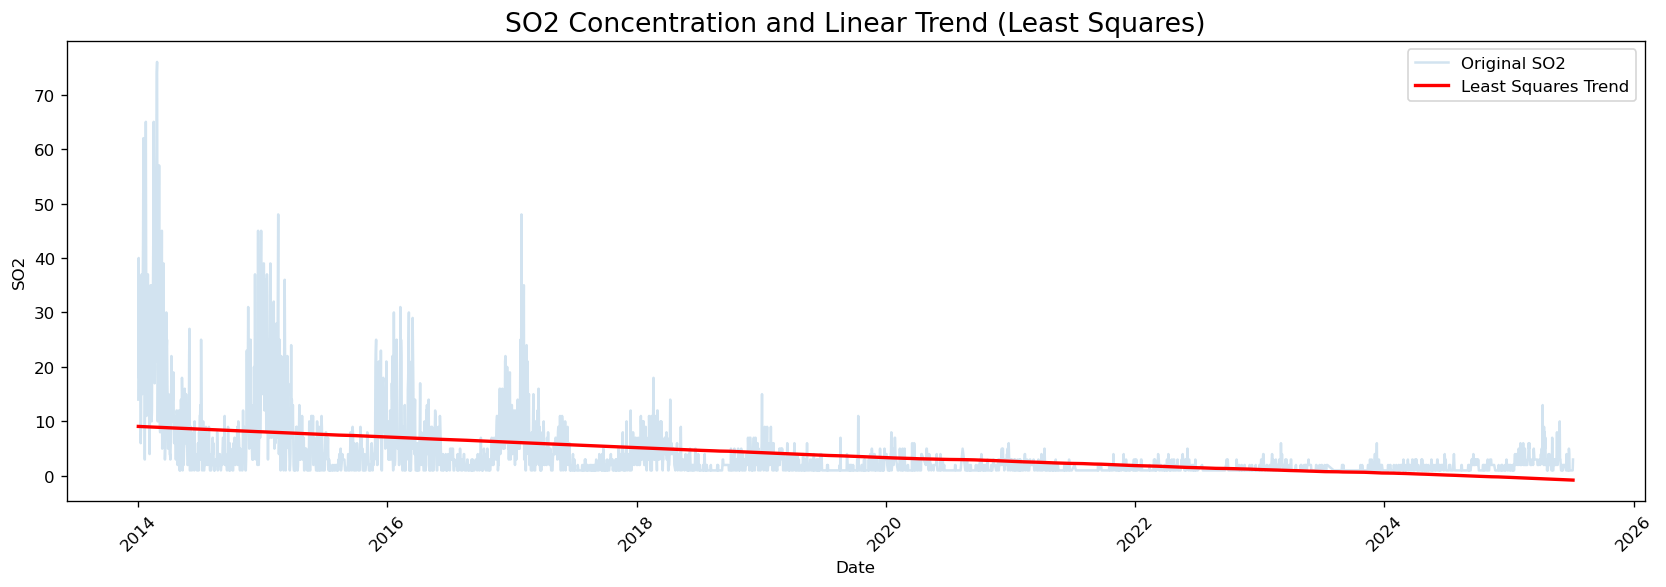

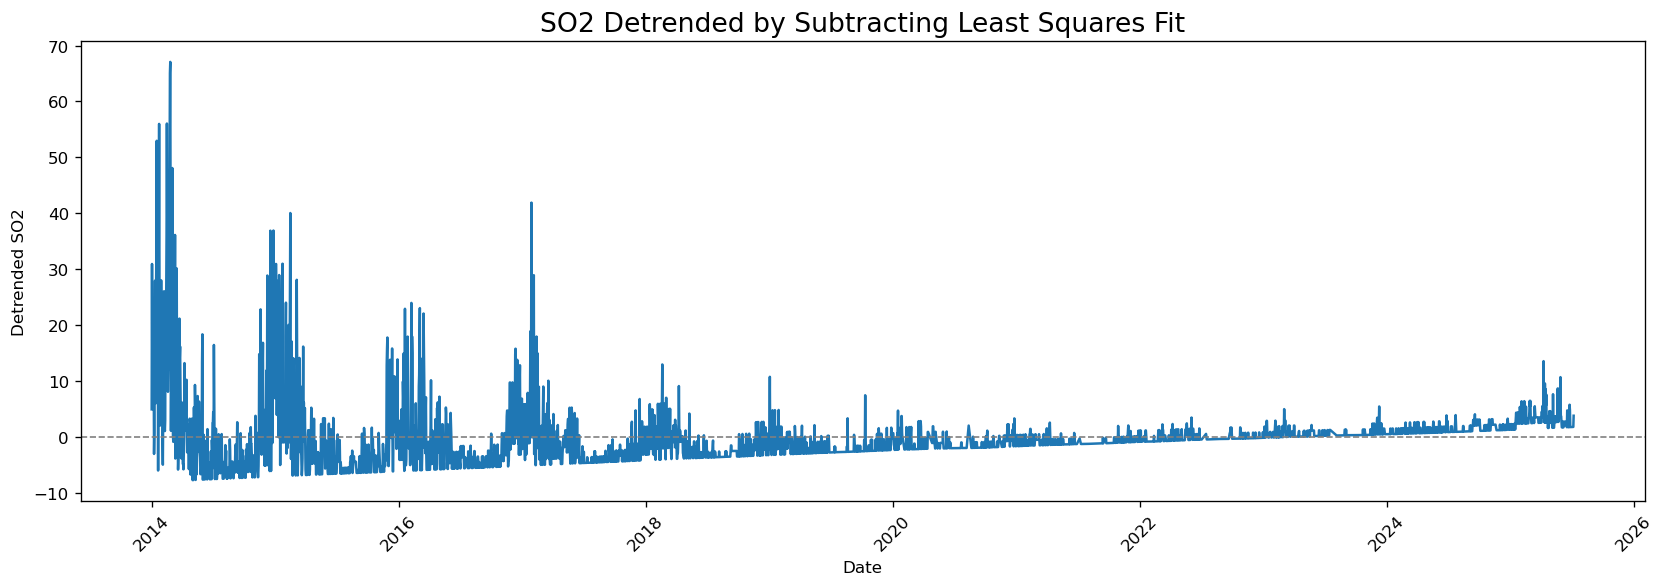

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def plot_detrended_pollutant(df, pollutant):
    # Drop NaNs and keep date + selected pollutant
    cleaned = df[['date', pollutant]].dropna().copy()
    cleaned['date'] = pd.to_datetime(cleaned['date'])

    # Create numeric time index for regression (e.g., 0, 1, 2, ..., n)
    time_numeric = np.arange(len(cleaned)).reshape(-1, 1)

    # Fit linear regression
    model = LinearRegression()
    model.fit(time_numeric, cleaned[pollutant].values)
    trend_line = model.predict(time_numeric)

    # Detrend the data
    detrended = cleaned[pollutant].values - trend_line

    # --- Plot original data and trend ---
    plt.figure(figsize=(14, 5))
    plt.plot(cleaned['date'], cleaned[pollutant], label=f'Original {pollutant}', alpha=0.2)
    plt.plot(cleaned['date'], trend_line, label='Least Squares Trend', color='red', linewidth=2)
    plt.title(f'{pollutant} Concentration and Linear Trend (Least Squares)', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(pollutant)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # --- Plot detrended data ---
    plt.figure(figsize=(14, 5))
    plt.plot(cleaned['date'], detrended, label=f'Detrended {pollutant}')
    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.title(f'{pollutant} Detrended by Subtracting Least Squares Fit', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(f'Detrended {pollutant}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_detrended_pollutant(bjg_df, 'SO2')

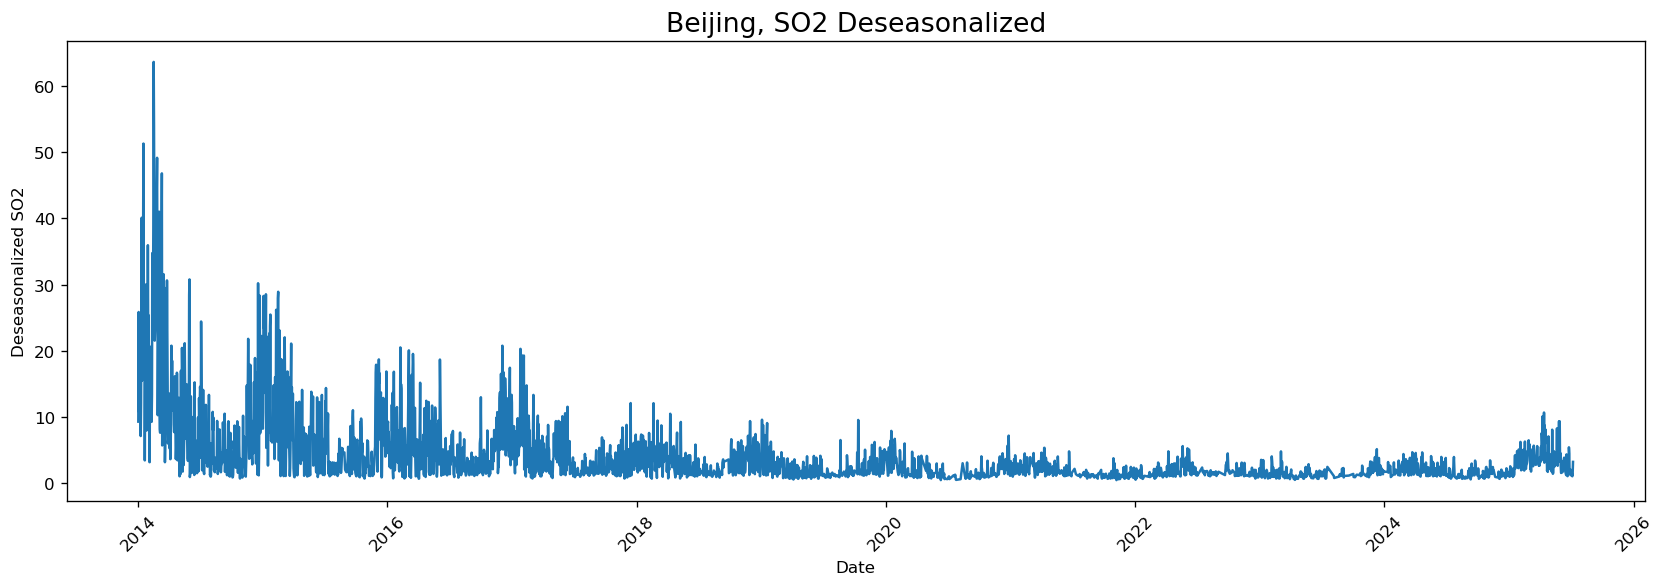

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_deseasonalized_pollutant(df, pollutant="", city_name="", period=365):
    # Drop NA and ensure datetime index
    cleaned = df[['date', pollutant]].dropna().copy()
    cleaned['date'] = pd.to_datetime(cleaned['date'])
    cleaned = cleaned.set_index('date')

    # Resample to daily frequency and drop missing
    cleaned = cleaned.asfreq('D').dropna()

    # Seasonal decomposition (multiplicative model)
    result = seasonal_decompose(cleaned[pollutant], model='multiplicative', period=period, extrapolate_trend='freq')

    # Deseasonalize
    deseasonalized = cleaned[pollutant] / result.seasonal

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(deseasonalized, label=f'Deseasonalized {pollutant}')
    plt.title(f'{city_name}, {pollutant} Deseasonalized', fontsize=16)
    plt.xlabel('Date')
    plt.ylabel(f'Deseasonalized {pollutant}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_deseasonalized_pollutant(bjg_df, 'SO2', city_name="Beijing")

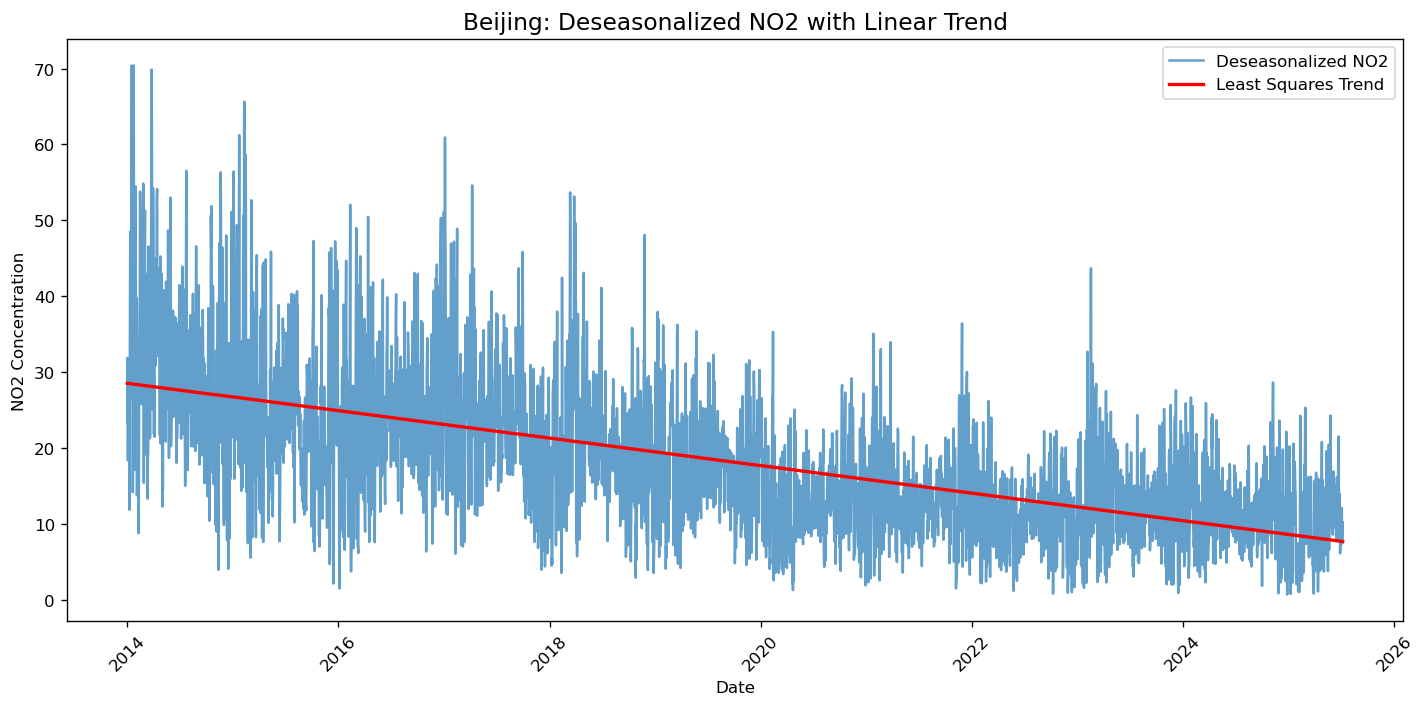

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

def plot_deseasonalized_trend(df, pollutant, city_name="", period=365):
    """
    Cleans, deseasonalizes, and fits a linear trend to a given pollutant time series.

    Parameters:
    - df: DataFrame with 'date' and pollutant columns
    - pollutant: column name of the pollutant (string)
    - city_name: name of the city for the title (optional)
    - period: seasonality period (default 365 for yearly)
    """
    
    # --- Clean and prepare data ---
    cleaned = df[['date', pollutant]].dropna().copy()
    cleaned['date'] = pd.to_datetime(cleaned['date'])
    cleaned = cleaned.set_index('date').asfreq('D').dropna()

    # --- Deseasonalize using multiplicative model ---
    result = seasonal_decompose(cleaned[pollutant], model='multiplicative', period=period, extrapolate_trend='freq')
    deseasonalized = cleaned[pollutant] / result.seasonal

    # --- Create numeric time index for regression ---
    time_numeric = np.arange(len(deseasonalized)).reshape(-1, 1)

    # --- Fit linear regression ---
    model = LinearRegression()
    model.fit(time_numeric, deseasonalized.values)
    trend_line = model.predict(time_numeric)

    # --- Plot result ---
    plt.figure(figsize=(12, 6))
    plt.plot(deseasonalized.index, deseasonalized, label=f'Deseasonalized {pollutant}', alpha=0.7)
    plt.plot(deseasonalized.index, trend_line, color='red', linewidth=2, label='Least Squares Trend')
    plt.title(f'{city_name}: Deseasonalized {pollutant} with Linear Trend', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Concentration')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_deseasonalized_trend(bjg_df, 'NO2', 'Beijing')